Mental Health in Tech: People working in tech are often at their desks for extended amounts of time. 
Explore how this trend correlates with mental health. Examine the data coollected through surveys
search for trends. Find out if there is a link between mental health and companies that offer wellness programs. 
What do the results show you about the state of mental health in tech? 
Can you suggest steps that companies can take to help their employees?


MAIN QUESTIONS

1.Does remote work affect an individual's mental health more compared to someone who works on site?(self employed VS work in organisation ) (Jane)

2.Are there differences in mental health between those working in startups vs large tech companies(Size of company)? (Loku)

3.Is mental health more prevalent in different regions?(US) Does US have a bigger issue with mental health compared to other countries?(Keegan)

4.Does mental health interfere with work? (Lishi ) (Also note, josh said this may be too broad of a question, maybe add more details and specifics)



In [ ]:
#To avoid clashing when making branches and mergeing them, can everyone please put their name on the section of code they write
# This is so we do not overwrite each others work.

In [7]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Define the path to the CSV file
file_path = Path('files/survey.csv')  # Replace 'your_file_name.csv' with the actual file name

# Read the CSV file into a DataFrame
data_df = pd.read_csv(file_path)

# Display the DataFrame
data_df.head()

#print(data_df.columns.tolist())  # This will print a list of the column names


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [8]:
#Keegan Code here

#filter data
us_data = data_df[data_df['Country'] == 'United States']
other_countries_data = data_df[data_df['Country'] != 'United States']

# Analyze the Data
# 'treatment' column to see how many people sought treatment
us_treatment_count = us_data['treatment'].value_counts(normalize=True)
other_countries_treatment_count = other_countries_data['treatment'].value_counts(normalize=True)

# Combine the results into a DataFrame for comparison
country_comparison_df = pd.DataFrame({
    'US': us_treatment_count,
    'Other Countries': other_countries_treatment_count
}).fillna(0)  # Fill NaN values with 0


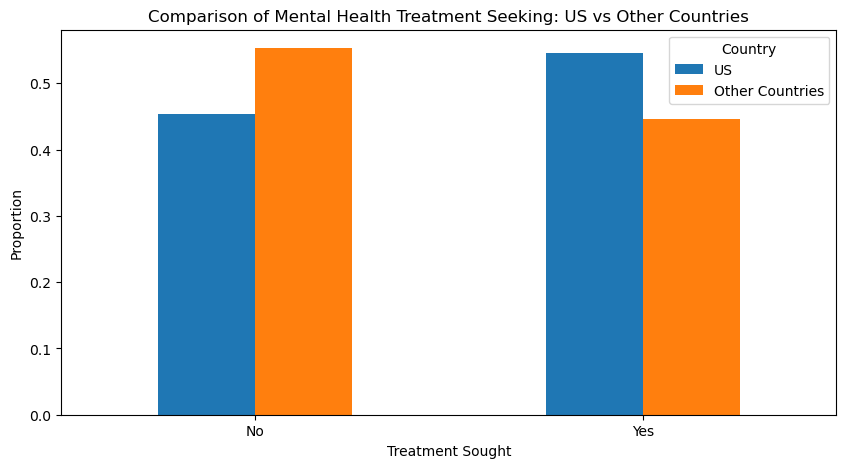

In [10]:
#Keegan
# Visualize the Results
country_comparison_df.plot(kind='bar', figsize=(10, 5))
plt.title('Comparison of Mental Health Treatment Seeking: US vs Other Countries')
plt.xlabel('Treatment Sought')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Country')
plt.show()